<a href="https://colab.research.google.com/github/bonareri/Machine-Learning/blob/main/Cats_Dogs_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1: Getting the Dataset

In [11]:
# Unzipping the Cats and Dogs dataset
!unzip /content/cats-and-dogs.zip -d /content/cats-and-dogs

Archive:  /content/cats-and-dogs.zip
  inflating: /content/cats-and-dogs/test/cat_s/cat_1.jpg  
  inflating: /content/cats-and-dogs/test/cat_s/cat_106.jpg  
  inflating: /content/cats-and-dogs/test/cat_s/cat_109.jpg  
  inflating: /content/cats-and-dogs/test/cat_s/cat_113.jpg  
  inflating: /content/cats-and-dogs/test/cat_s/cat_114.jpg  
  inflating: /content/cats-and-dogs/test/cat_s/cat_116.jpg  
  inflating: /content/cats-and-dogs/test/cat_s/cat_118.jpg  
  inflating: /content/cats-and-dogs/test/cat_s/cat_119.jpg  
  inflating: /content/cats-and-dogs/test/cat_s/cat_124.jpg  
  inflating: /content/cats-and-dogs/test/cat_s/cat_140.jpg  
  inflating: /content/cats-and-dogs/test/cat_s/cat_147.jpg  
  inflating: /content/cats-and-dogs/test/cat_s/cat_156.jpg  
  inflating: /content/cats-and-dogs/test/cat_s/cat_158.jpg  
  inflating: /content/cats-and-dogs/test/cat_s/cat_162.jpg  
  inflating: /content/cats-and-dogs/test/cat_s/cat_18.jpg  
  inflating: /content/cats-and-dogs/test/cat_s/cat_

In [12]:
import os

base_dir = "/content/cats-and-dogs"
train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")

print("Train folders:", os.listdir(train_dir))
print("Test folders:", os.listdir(test_dir))

Train folders: ['cats', 'dogs']
Test folders: ['cat_s', 'dogs']


##  2: Load the Dataset

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Normalize pixel values to [0, 1]
train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Load training and testing data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize all images to 150x150
    batch_size=32,
    class_mode='binary'  # Binary classification (cats vs dogs)
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 555 images belonging to 2 classes.
Found 138 images belonging to 2 classes.


## 3: Verify Data Loaders

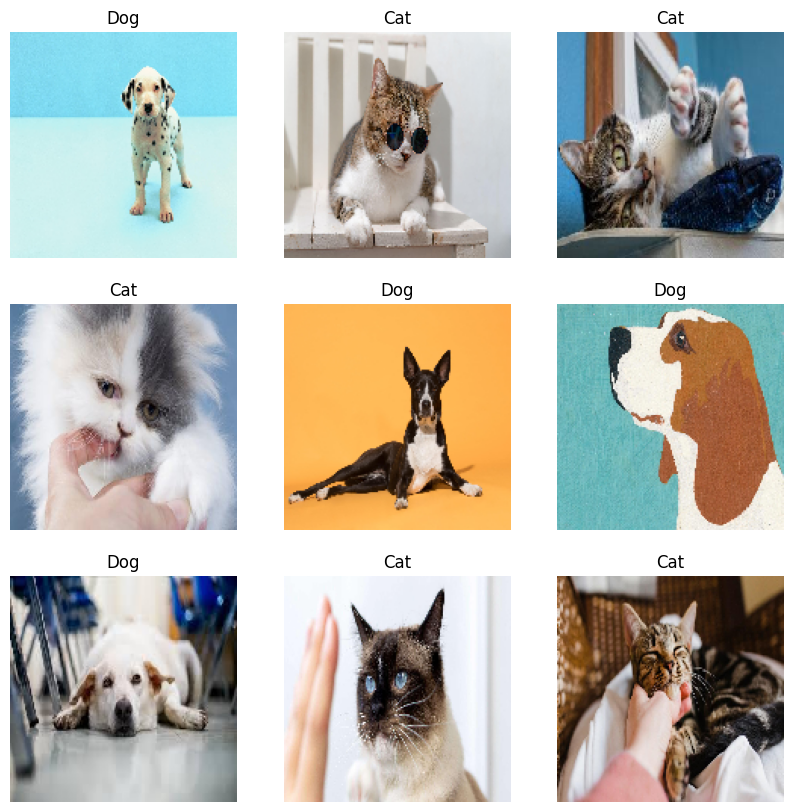

In [14]:
import matplotlib.pyplot as plt

# Fetch one batch of images
images, labels = next(train_generator)

# Plot a few images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    plt.title("Dog" if labels[i] == 1 else "Cat")
    plt.axis('off')
plt.show()

## Build the CNN Model

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential([
    # Convolutional layers
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten the output
    Flatten(),

    # Fully connected layers
    Dense(128, activation='relu'),
    Dropout(0.5),  # Prevent overfitting
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

## Train the Model

In [16]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.5016 - loss: 1.0704 - val_accuracy: 0.5000 - val_loss: 0.6943
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.5219 - loss: 0.6914 - val_accuracy: 0.6087 - val_loss: 0.6892
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.5822 - loss: 0.6830 - val_accuracy: 0.5435 - val_loss: 0.7218
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.5905 - loss: 0.6728 - val_accuracy: 0.5290 - val_loss: 0.6960
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.6362 - loss: 0.6410 - val_accuracy: 0.5870 - val_loss: 0.6654
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.6684 - loss: 0.6099 - val_accuracy: 0.6594 - val_loss: 0.6550
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.7218 - loss: 0.5860 - val_accuracy: 0.5870 - val_loss: 0.6884
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.7410 - loss: 0.5132 - val_accuracy: 0.6667 - val_loss: 0.6741
Epo

## Plot Training and Validation Results

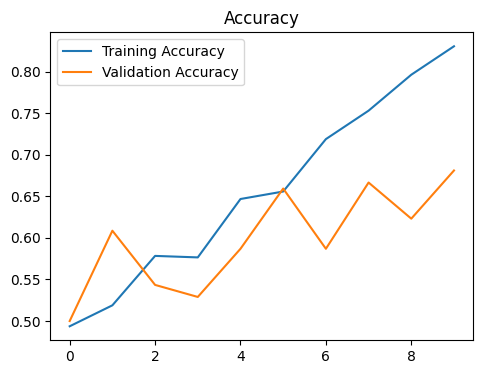

In [17]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.show()


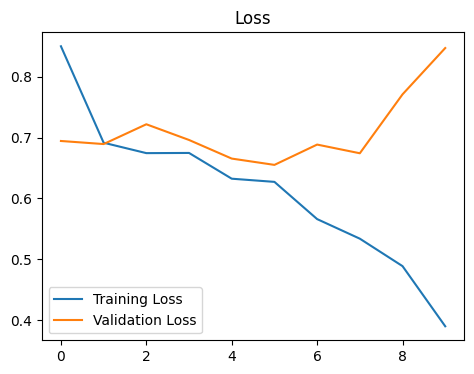

In [18]:
# Plot loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()


## Evaluate the Model

In [19]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.2f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 647ms/step - accuracy: 0.6819 - loss: 0.8295
Test Accuracy: 0.68


## Make Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


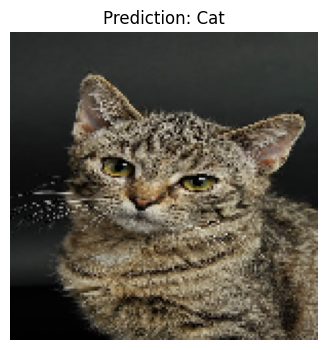

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Load a single image for prediction
img_path = "/content/cat.jpeg"
img = image.load_img(img_path, target_size=(150, 150))

# Preprocess the image
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict using the model
prediction = model.predict(img_array)
result = "Dog" if prediction[0][0] > 0.5 else "Cat"

# Display the image with the prediction
plt.figure(figsize=(4, 4))
plt.imshow(img)
plt.title(f"Prediction: {result}")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


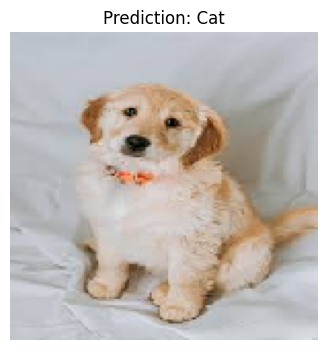

In [23]:
# Load a single image for prediction
img_path = "/content/dog.jpg"
img = image.load_img(img_path, target_size=(150, 150))

# Preprocess the image
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict using the model
prediction = model.predict(img_array)
result = "Dog" if prediction[0][0] > 0.5 else "Cat"

# Display the image with the prediction
plt.figure(figsize=(4, 4))
plt.imshow(img)
plt.title(f"Prediction: {result}")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


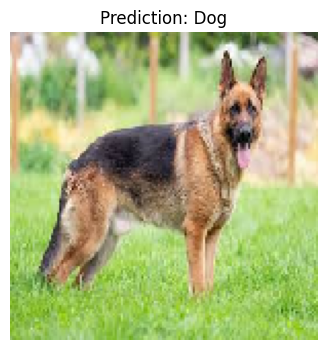

In [24]:
# Load a single image for prediction
img_path = "/content/dog_1.jpg"
img = image.load_img(img_path, target_size=(150, 150))

# Preprocess the image
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict using the model
prediction = model.predict(img_array)
result = "Dog" if prediction[0][0] > 0.5 else "Cat"

# Display the image with the prediction
plt.figure(figsize=(4, 4))
plt.imshow(img)
plt.title(f"Prediction: {result}")
plt.axis('off')
plt.show()